In [216]:
%load_ext autoreload
%autoreload 2

import sys,os

os.environ["IRONCLUST_PATH"] = "/disk/scratch/mhennig/spikeinterface/ironclust"
os.environ["KILOSORT_PATH"] = "/disk/scratch/mhennig/spikeinterface/KiloSort/"
os.environ["KILOSORT2_PATH"] = "/disk/scratch/mhennig/spikeinterface/Kilosort2/"
os.environ["HDSORT_PATH"] = "/disk/scratch/mhennig/spikeinterface/HDsort"

os.environ["TMP"] = "/disk/scratch/mhennig/tmp"
os.environ["TMPDIR"] = "/disk/scratch/mhennig/tmp"
os.environ["TEMPDIR"] = "/disk/scratch/mhennig/tmp"
os.environ["ML_TEMPORARY_DIRECTORY"] = "/disk/scratch/mhennig/tmp/"

import matplotlib.pyplot as plt
import numpy as np
import time
import pickle
from pathlib import Path
import pandas as pd
import seaborn as sns
import tempfile
from collections import defaultdict
import matplotlib.gridspec as gridspec
from matplotlib import transforms

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #if needed

import spikeinterface as si
import spikeextractors as se
import spiketoolkit as st
import spikesorters as ss
import spikecomparison as sc
import spikewidgets as sw
from spikecomparison import GroundTruthStudy, MultiSortingComparison

%matplotlib inline
# %matplotlib notebook

save_figs = False

def clear_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
si.print_spikeinterface_version()
ss.print_sorter_versions()

spikeinterface: 0.9.9
  * spikeextractor: 0.8.4
  * spiketoolkit: 0.6.3
  * spikesorters: 0.3.2
  * spikecomparison: 0.2.6
  * spikewidgets: 0.4.3

hdsort: version = '1.0.0'

herdingspikes: 0.3.7
ironclust: 5.9.8
kilosort2: git-48bf2b81d8ad
klusta: 3.0.16
mountainsort4: unknown
spykingcircus: 0.9.7
tridesclous: 1.6.0


In [3]:

data_p = Path('/disk/data/Allen_Brain_NPX/mouse412804_probeC/mda_15min/')
p = Path('/disk/scratch/mhennig/spikeinterface/Neuropixels_Allen/')
study_folder = p / 'study_15min/'
working_folder = p / 'working_15min'

sorter_list = ['herdingspikes', 'kilosort2', 'ironclust', 'tridesclous', 'spykingcircus', 'hdsort']
sorter_params = {
#     'kilosort2': {'keep_good_only': True},
    'mountainsort4': {'adjacency_radius': 50},
    'spyking_circus': {'adjacency_radius': 50},
    'herdingspikes': {'filter': True, 
                     }
}
sorter_names = ['HerdingSpikes', 'Kilosort2', 'Ironclust','Tridesclous', 'SpykingCircus', 'HDSort']
sorter_names_short = ['HS', 'KS', 'IC', 'TDC', 'SC', 'HDS']


In [4]:
recording = se.MdaRecordingExtractor(data_p)

if not study_folder.is_dir():
    print('Setting up study folder:', study_folder)
    os.mkdir(study_folder)
    
rec_dict = {'rec': recording}

print('-----------------------------------------')
print('Running sorters')
result_dict = ss.run_sorters(sorter_list=sorter_list, recording_dict_or_list=rec_dict, with_output=True,
                             sorter_params=sorter_params, working_folder=working_folder, engine='loop', 
                             mode='keep', verbose=True)

print('-----------------------------------------')
print('Saving results')
for s in sorter_list:
    if not (study_folder / 'sortings' ).is_dir():
        os.mkdir(study_folder / 'sortings')
    if not (study_folder / 'sortings' / str(s)).is_dir():
        os.mkdir(study_folder / 'sortings' / str(s))
    sorting = result_dict[('rec', s)]
    se.NpzSortingExtractor.write_sorting(sorting, study_folder / 'sortings' / str(s + '.npz'))
        

-----------------------------------------
Running sorters
# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 30000
# Localization On
# Number of recorded channels: 248
# Analysing frames: 27000000; Seconds: 900.0
# Frames before spike in cutout: 9
# Frames after spike in cutout: 54
# tcuts: 39 84
# tInc: 100000
# Analysing frames from -39 to 100084  (0.0%)
# Analysing frames from 99961 to 200084  (0.4%)
# Analysing frames from 199961 to 300084  (0.7%)
# Analysing frames from 299961 to 400084  (1.1%)
# Analysing frames from 399961 to 500084  (1.5%)
# Analysing frames from 499961 to 600084  (1.9%)
# Analysing frames from 599961 to 700084  (2.2%)
# Analysing frames from 699961 to 800084  (2.6%)
# Analysing frames from 799961 to 900084  (3.0%)
# Analysing frames from 899961 to 1000084  (3.3%)
# Analysing frames from 999961 to 1100084  (3.7%)
# Analysing frames from 1099961 to 1200084  (4.1%)
# Analysing frames from 1199961 to 1300084  (4

# Analysing frames from 14999961 to 15100084  (55.6%)
# Analysing frames from 15099961 to 15200084  (55.9%)
# Analysing frames from 15199961 to 15300084  (56.3%)
# Analysing frames from 15299961 to 15400084  (56.7%)
# Analysing frames from 15399961 to 15500084  (57.0%)
# Analysing frames from 15499961 to 15600084  (57.4%)
# Analysing frames from 15599961 to 15700084  (57.8%)
# Analysing frames from 15699961 to 15800084  (58.1%)
# Analysing frames from 15799961 to 15900084  (58.5%)
# Analysing frames from 15899961 to 16000084  (58.9%)
# Analysing frames from 15999961 to 16100084  (59.3%)
# Analysing frames from 16099961 to 16200084  (59.6%)
# Analysing frames from 16199961 to 16300084  (60.0%)
# Analysing frames from 16299961 to 16400084  (60.4%)
# Analysing frames from 16399961 to 16500084  (60.7%)
# Analysing frames from 16499961 to 16600084  (61.1%)
# Analysing frames from 16599961 to 16700084  (61.5%)
# Analysing frames from 16699961 to 16800084  (61.9%)
# Analysing frames from 1679

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:   24.6s remaining:  1.2min
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   31.1s remaining:    6.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   31.6s finished


Number of estimated units: 210
Saving to /disk/scratch/mhennig/spikeinterface/Neuropixels_Allen/working_15min/rec/herdingspikes/HS2_sorted.hdf5
herdingspikes run time 834.69s
RUNNING SHELL SCRIPT: /disk/scratch/mhennig/spikeinterface/Neuropixels_Allen/working_15min/rec/kilosort2/run_kilosort2.sh
kilosort2 run time 658.90s
Num. channels = 248, Num. timepoints = 27000000, duration = 15.0 minutes
Creating argfile.txt...
Running ironclust in /disk/scratch/mhennig/spikeinterface/Neuropixels_Allen/working_15min/rec/ironclust/tmp...
RUNNING SHELL SCRIPT: /disk/scratch/mhennig/spikeinterface/Neuropixels_Allen/working_15min/rec/ironclust/run_ironclust.sh
ironclust run time 837.99s
Local copy of recording
DataIO <id: 140710502608792> 
  workdir: /disk/scratch/mhennig/spikeinterface/Neuropixels_Allen/working_15min/rec/tridesclous
  sample_rate: 30000.0
  total_channel: 248
  channel_groups: 0 [ch0 ch1 ch2 ch3 ... ch244 ch245 ch246 ch247]
  nb_segment: 1
  length: 27000000
  durations: 900.0 s.
ca

In [5]:
# load sortings
sorter_folder = Path('study_15min/sortings/')
sortings = []
for s in sorter_list:
    sortings.append(result_dict['rec',s])

In [6]:
# multi-comparison
mcmp = sc.compare_multiple_sorters(sorting_list=sortings, name_list=sorter_names_short, 
                                   verbose=True)


Multicomaprison step 1: pairwise comparison
  Comparing:  HS  and  KS
  Comparing:  HS  and  IC
  Comparing:  HS  and  TDC
  Comparing:  HS  and  SC
  Comparing:  HS  and  HDS
  Comparing:  KS  and  IC
  Comparing:  KS  and  TDC
  Comparing:  KS  and  SC
  Comparing:  KS  and  HDS
  Comparing:  IC  and  TDC
  Comparing:  IC  and  SC
  Comparing:  IC  and  HDS
  Comparing:  TDC  and  SC
  Comparing:  TDC  and  HDS
  Comparing:  SC  and  HDS
Multicomaprison step 2: make graph
Multicomaprison step 3: clean graph
Removed edge ('IC_137', 'HS_49', {'weight': 0.552943287867911})
Removed edge ('KS_185', 'HDS_18005', {'weight': 0.6143539400371452})
Removed edge ('KS_295', 'HS_159', {'weight': 0.6111111111111112})
Removed edge ('KS_195', 'TDC_8', {'weight': 0.6909090909090909})
Removed 4 duplicate nodes
Multicomaprison step 4: extract agreement from graph


# Plot agreement between sorters

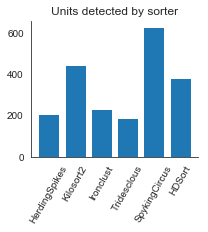

In [7]:
# number of units found

if save_figs:
    plt.figure(figsize=(3/2,2.5/2))
else:
    plt.figure(figsize=(3,2.5))
    
ax = plt.subplot(111)
n = []
for s in sortings:
    n.append(len(s.get_unit_ids()))
plt.bar(range(len(sortings)), n)
ax.set_xticks(range(len(sorter_names)))
ax.set_xticklabels(sorter_names, rotation=60, ha='center')
plt.title('Units detected by sorter') 
clear_axes(ax)

if save_figs:
    plt.savefig(study_folder / 'numunits.pdf', bbox_inches='tight')

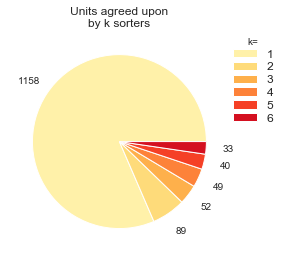

In [8]:
w = sw.plot_multicomp_agreement(mcmp, plot_type='pie')

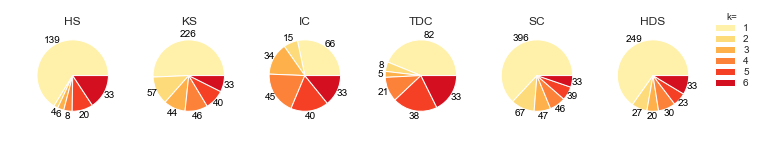

In [9]:
w = sw.plot_multicomp_agreement_by_sorter(mcmp)

In [16]:
curated1 = se.NpzSortingExtractor('phy_curated_good.npz')
curated2 = se.NpzSortingExtractor('sorting_JS.npz')

In [207]:
comparison_curated = sc.compare_two_sorters(curated1, curated2)

In [189]:
sorting = mcmp.get_agreement_sorting(minimum_agreement_count=2)
consensus_sortings = []
units_dict = defaultdict(list)
units = [sorting.get_unit_property(u,'sorter_unit_ids') for u in sorting.get_unit_ids()]
for au in units:
    for u in au.items():
        units_dict[u[0]].append(u[1])
for i,s in enumerate(sorter_names_short):
    consensus_sortings.append(se.SubSortingExtractor(sortings[i], unit_ids=units_dict[s]))

sorting = mcmp.get_agreement_sorting(minimum_agreement_count=1, minimum_agreement_count_only=True)
unmatched_sortings = []
units_dict = defaultdict(list)
units = [sorting.get_unit_property(u,'sorter_unit_ids') for u in sorting.get_unit_ids()]
for au in units:
    for u in au.items():
        units_dict[u[0]].append(u[1])
for i,s in enumerate(sorter_names_short):
    unmatched_sortings.append(se.SubSortingExtractor(sortings[i], unit_ids=units_dict[s]))
    
consensus_curated_comparisons = []
for s in consensus_sortings:
    consensus_curated_comparisons.append(sc.compare_two_sorters(s, curated1))
    consensus_curated_comparisons.append(sc.compare_two_sorters(s, curated2))    
    
unmatched_curated_comparisons = []
for s in unmatched_sortings:
    unmatched_curated_comparisons.append(sc.compare_two_sorters(s, curated1))
    unmatched_curated_comparisons.append(sc.compare_two_sorters(s, curated2))

all_curated_comparisons = []
for s in sortings:
    all_curated_comparisons.append(sc.compare_two_sorters(s, curated1))
    all_curated_comparisons.append(sc.compare_two_sorters(s, curated2))    
    
curated_comparison = sc.compare_two_sorters(curated1, curated2)

In [240]:
count_mapped = lambda x : np.sum([u!=-1 for u in x.get_mapped_unit_ids()])
count_not_mapped = lambda x : np.sum([u==-1 for u in x.get_mapped_unit_ids()])
count_units = lambda x : len(x.get_unit_ids())

n_consensus_mapped = np.array([count_mapped(c.get_mapped_sorting1()) for c in consensus_curated_comparisons])
n_unmatched_consensus_mapped = np.array([count_mapped(c.get_mapped_sorting1()) for c in unmatched_curated_comparisons])
n_all_mapped = np.array([count_mapped(c.get_mapped_sorting1()) for c in all_curated_comparisons])
n_unmatched_all_mapped = np.array([count_not_mapped(c.get_mapped_sorting1()) for c in all_curated_comparisons])
n_consensus = np.array([count_units(c.sorting1) for c in consensus_curated_comparisons])
n_all = np.array([count_units(s) for s in sortings])


258 319


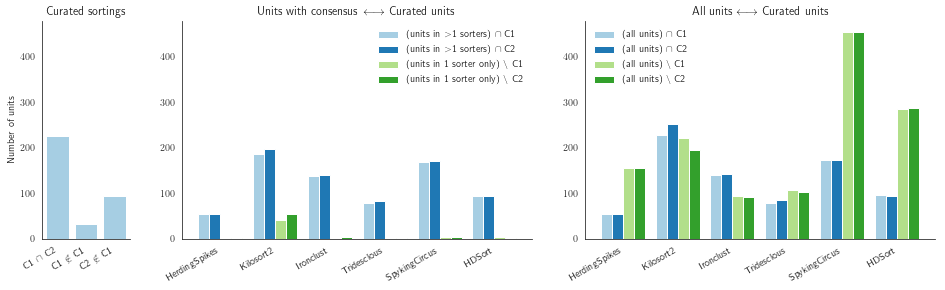

In [261]:
plt.figure(figsize=(16,4))
sns.set_palette(sns.color_palette("Paired"))

gs = gridspec.GridSpec(ncols=3,nrows=1,width_ratios=(0.1,0.4,0.4))

ax = plt.subplot(gs[0,0])
y = [count_mapped(comparison_curated.get_mapped_sorting1()),
    count_not_mapped(comparison_curated.get_mapped_sorting1()),
    count_not_mapped(comparison_curated.get_mapped_sorting2())]
plt.bar(range(3),y)
ax.set_xticks(range(3))
ax.set_xticklabels(('C1 $\\cap$ C2', 'C1 $\\notin$ C1', 'C2 $\\notin$ C1'), rotation=30, ha='right')
plt.ylabel('Number of units')
plt.title('Curated sortings')
clear_axes(ax)

ax = plt.subplot(gs[0,1], sharey=ax)
plt.bar(np.arange(len(sorter_list))-0.3,(n_consensus_mapped).reshape((len(sorter_list),2))[:,0], 
        width=0.2, label='(units in $>$1 sorters) $\\cap$ C1')
plt.bar(np.arange(len(sorter_list))-0.1,(n_consensus_mapped).reshape((len(sorter_list),2))[:,1], 
        width=0.2, label='(units in $>$1 sorters) $\\cap$ C2')
plt.bar(np.arange(len(sorter_list))+0.1,(n_unmatched_consensus_mapped).reshape((len(sorter_list),2))[:,0], 
        width=0.2, label='(units in 1 sorter only) $\\setminus$ C1')
plt.bar(np.arange(len(sorter_list))+0.3,(n_unmatched_consensus_mapped).reshape((len(sorter_list),2))[:,1], 
        width=0.2, label='(units in 1 sorter only) $\\setminus$ C2')
ax.set_xticks(range(6));
ax.set_xticklabels(sorter_names_short);
plt.title('Units with consensus $\\longleftrightarrow$ Curated units')
ax.set_xticklabels(sorter_names, rotation=30, ha='right')
plt.legend(frameon=False)
clear_axes(ax)

ax = plt.subplot(gs[0,2], sharey=ax)
plt.bar(np.arange(len(sorter_list))-0.3,(n_all_mapped).reshape((len(sorter_list),2))[:,0], 
        width=0.2, label='(all units) $\\cap$ C1')
plt.bar(np.arange(len(sorter_list))-0.1,(n_all_mapped).reshape((len(sorter_list),2))[:,1], 
        width=0.2, label='(all units) $\\cap$ C2')
plt.bar(np.arange(len(sorter_list))+0.1,(n_unmatched_all_mapped).reshape((len(sorter_list),2))[:,0], 
        width=0.2, label='(all units) $\\setminus$ C1')
plt.bar(np.arange(len(sorter_list))+0.3,(n_unmatched_all_mapped).reshape((len(sorter_list),2))[:,1], 
        width=0.2, label='(all units) $\\setminus$ C2')
ax.set_xticks(range(6));
ax.set_xticklabels(sorter_names_short);
plt.title('All units $\\longleftrightarrow$ Curated units')
ax.set_xticklabels(sorter_names, rotation=30, ha='right')
plt.legend(frameon=False)
clear_axes(ax)


In [148]:
sortings_curated = sortings.copy()
sortings_curated.append(curated1)
sortings_curated.append(curated2)

sorter_names_short_curated = sorter_names_short.copy()
sorter_names_short_curated.append('C1')
sorter_names_short_curated.append('C2')

mcmp_curated = sc.compare_multiple_sorters(sorting_list=sortings_curated, name_list=sorter_names_short_curated, 
                                   verbose=True)


Multicomaprison step 1: pairwise comparison
  Comparing:  HS  and  KS
  Comparing:  HS  and  IC
  Comparing:  HS  and  TDC
  Comparing:  HS  and  SC
  Comparing:  HS  and  HDS
  Comparing:  HS  and  C1
  Comparing:  HS  and  C2
  Comparing:  KS  and  IC
  Comparing:  KS  and  TDC
  Comparing:  KS  and  SC
  Comparing:  KS  and  HDS
  Comparing:  KS  and  C1
  Comparing:  KS  and  C2
  Comparing:  IC  and  TDC
  Comparing:  IC  and  SC
  Comparing:  IC  and  HDS
  Comparing:  IC  and  C1
  Comparing:  IC  and  C2
  Comparing:  TDC  and  SC
  Comparing:  TDC  and  HDS
  Comparing:  TDC  and  C1
  Comparing:  TDC  and  C2
  Comparing:  SC  and  HDS
  Comparing:  SC  and  C1
  Comparing:  SC  and  C2
  Comparing:  HDS  and  C1
  Comparing:  HDS  and  C2
  Comparing:  C1  and  C2
Multicomaprison step 2: make graph
Multicomaprison step 3: clean graph
Removed edge ('C1_180', 'IC_137', {'weight': 0.5729602035253498})
Removed edge ('C2_180', 'IC_137', {'weight': 0.5729602035253498})
Removed edg

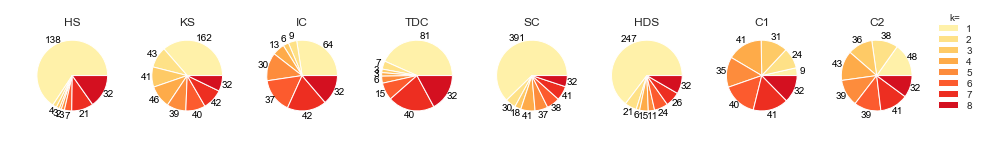

In [149]:
w = sw.plot_multicomp_agreement_by_sorter(mcmp_curated)

In [152]:
sortings_curated = consensus_sortings.copy()
sortings_curated.append(curated1)
sortings_curated.append(curated2)

sorter_names_short_curated = sorter_names_short.copy()
sorter_names_short_curated.append('C1')
sorter_names_short_curated.append('C2')

mcmp_consensus_curated = sc.compare_multiple_sorters(sorting_list=sortings_curated, name_list=sorter_names_short_curated, 
                                   verbose=True)


Multicomaprison step 1: pairwise comparison
  Comparing:  HS  and  KS
  Comparing:  HS  and  IC
  Comparing:  HS  and  TDC
  Comparing:  HS  and  SC
  Comparing:  HS  and  HDS
  Comparing:  HS  and  C1
  Comparing:  HS  and  C2
  Comparing:  KS  and  IC
  Comparing:  KS  and  TDC
  Comparing:  KS  and  SC
  Comparing:  KS  and  HDS
  Comparing:  KS  and  C1
  Comparing:  KS  and  C2
  Comparing:  IC  and  TDC
  Comparing:  IC  and  SC
  Comparing:  IC  and  HDS
  Comparing:  IC  and  C1
  Comparing:  IC  and  C2
  Comparing:  TDC  and  SC
  Comparing:  TDC  and  HDS
  Comparing:  TDC  and  C1
  Comparing:  TDC  and  C2
  Comparing:  SC  and  HDS
  Comparing:  SC  and  C1
  Comparing:  SC  and  C2
  Comparing:  HDS  and  C1
  Comparing:  HDS  and  C2
  Comparing:  C1  and  C2
Multicomaprison step 2: make graph
Multicomaprison step 3: clean graph
Removed edge ('C1_186', 'HDS_18005', {'weight': 0.6245288099084545})
Removed edge ('C2_186', 'HDS_18005', {'weight': 0.6245288099084545})
Remov

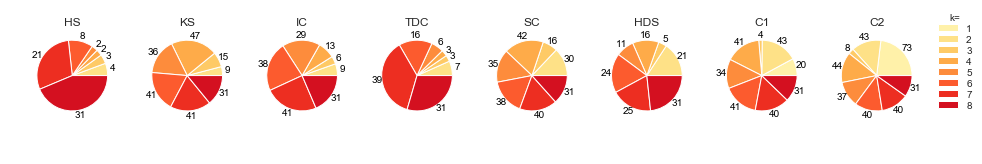

In [153]:
w = sw.plot_multicomp_agreement_by_sorter(mcmp_consensus_curated)

In [ ]:
# get sorting extractors with unit with no agreement (minimum agreement = 1) and one
# with at least 2 sorters in agreement
not_in_agreement = mcmp.get_agreement_sorting(minimum_agreement=1, minimum_agreement_only=True)
in_agreement = mcmp.get_agreement_sorting(minimum_agreement=2)

In [47]:
cmp_no_agr = sc.compare_sorter_to_ground_truth(curated, not_in_agreement)
cmp_agr = sc.compare_sorter_to_ground_truth(curated, in_agreement)

<IPython.core.display.Javascript object>


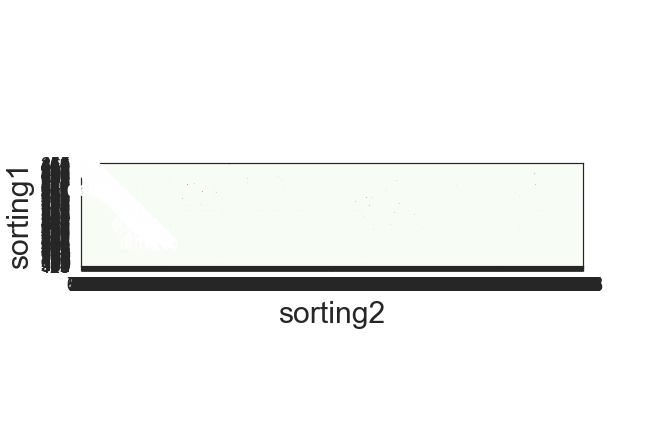

In [45]:
sw.plot_agreement_matrix(cmp_no_agr)

<IPython.core.display.Javascript object>


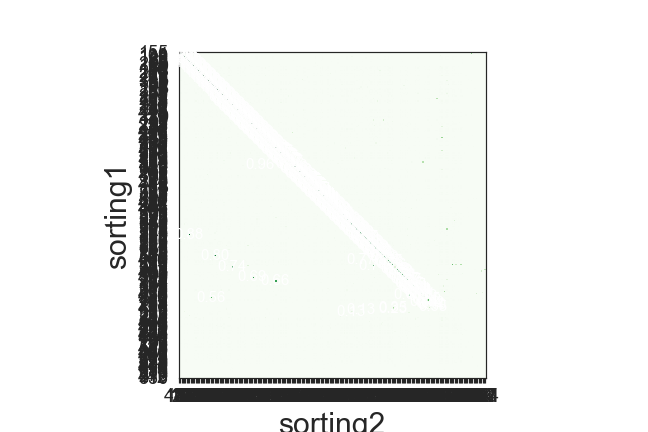

In [46]:
sw.plot_agreement_matrix(cmp_agr)

In [48]:
cmp_no_agr.print_summary()

SUMMARY
-------
GT num_units: 258
TESTED num_units: 1257
num_well_detected: 67 
num_redundant: 123
num_overmerged: 37
num_false_positive_units 973
num_bad: 1184



In [50]:
cmp_no_agr.print_performance()

PERFORMANCE (pooled_with_average)
-----------
ACCURACY: 27.109575967767345
RECALL: 27.41912512667099
PRECISION: 27.914309695816304
FALSE DISCOVERY RATE: 0.38026394759454757
MISS RATE: 0.8754485167398731



In [49]:
cmp_agr.print_summary()

SUMMARY
-------
GT num_units: 258
TESTED num_units: 243
num_well_detected: 159 
num_redundant: 12
num_overmerged: 12
num_false_positive_units 36
num_bad: 54



In [51]:
cmp_agr.print_performance()

PERFORMANCE (pooled_with_average)
-----------
ACCURACY: 66.61282483956475
RECALL: 71.65962088414578
PRECISION: 68.01342682437351
FALSE DISCOVERY RATE: 5.242387129114877
MISS RATE: 1.5961930693426076



In [36]:
len(np.where(np.array(cmp_no_agr.get_mapped_sorting1().get_mapped_unit_ids()) != -1)[0])

73

In [37]:
len(np.where(np.array(cmp_agr.get_mapped_sorting1().get_mapped_unit_ids()) != -1)[0])

189